In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

In [2]:
# Load Train data from our github repo
url_train = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train.csv'
dataDF_train = pd.read_csv(url_train)

# Load Train label data from our github repo
url_train_labels = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train_labels.csv'
dataDF_train_labels = pd.read_csv(url_train_labels)

# Load Problem data from our github repo
url_problem = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_test.csv'
dataDF_problem = pd.read_csv(url_problem)

In [3]:
# drop indexes 
dataDF_train = dataDF_train.drop("Unnamed: 0", axis = 1)
dataDF_train_labels = dataDF_train_labels.drop("Unnamed: 0", axis = 1)
dataDF_problem = dataDF_problem.drop("Unnamed: 0", axis = 1)

In [4]:
dnn_model = keras.Sequential([
      layers.Dense(units=1, input_shape=(78,)),
      layers.Dense(124, activation='relu'),
      layers.Dense(248, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))

In [5]:
history = dnn_model.fit(
    dataDF_train, dataDF_train_labels,
    batch_size = 64,
    epochs=100,
    verbose=0,
    validation_split = 0.1)

In [6]:
# Calculate R squared
from sklearn.metrics import r2_score

y_pred = dnn_model.predict(dataDF_train).astype(np.int64)
y_true = dataDF_train_labels.astype(np.int64)

r2_score(y_true, y_pred) 

0.38403600439791674

In [7]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

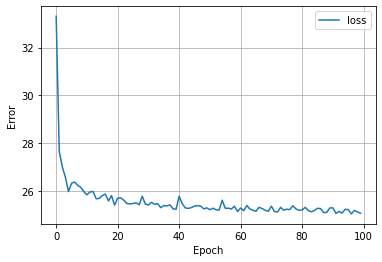

In [8]:
plot_loss(history)